In [1]:
%matplotlib inline
from model import client
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cli = client.Client()

In [3]:
cli.set_dates('2017-08-10',40)

2017-08-10 00:00:00


In [4]:
print cli.date_range

['2017-08-10T00:00:00', '2017-08-11T00:00:00', '2017-08-12T00:00:00', '2017-08-13T00:00:00', '2017-08-14T00:00:00', '2017-08-15T00:00:00', '2017-08-16T00:00:00', '2017-08-17T00:00:00', '2017-08-18T00:00:00', '2017-08-19T00:00:00', '2017-08-20T00:00:00', '2017-08-21T00:00:00', '2017-08-22T00:00:00', '2017-08-23T00:00:00', '2017-08-24T00:00:00', '2017-08-25T00:00:00', '2017-08-26T00:00:00', '2017-08-27T00:00:00', '2017-08-28T00:00:00', '2017-08-29T00:00:00', '2017-08-30T00:00:00', '2017-08-31T00:00:00', '2017-09-01T00:00:00', '2017-09-02T00:00:00', '2017-09-03T00:00:00', '2017-09-04T00:00:00', '2017-09-05T00:00:00', '2017-09-06T00:00:00', '2017-09-07T00:00:00', '2017-09-08T00:00:00', '2017-09-09T00:00:00', '2017-09-10T00:00:00', '2017-09-11T00:00:00', '2017-09-12T00:00:00', '2017-09-13T00:00:00', '2017-09-14T00:00:00', '2017-09-15T00:00:00', '2017-09-16T00:00:00', '2017-09-17T00:00:00', '2017-09-18T00:00:00']


In [5]:
cli.add_segment('ussel', ['saint brieuc'])

In [6]:
cli.segments

[{'destinations': ['saint brieuc'], 'origin': 'ussel'}]

In [7]:
cli.get_routes()


 Itineraries found for ussel-saint brieuc: 0


 Itineraries found for ussel-saint brieuc: 0


 Itineraries found for ussel-saint brieuc: 0


 Itineraries found for ussel-saint brieuc: 0


 Itineraries found for ussel-saint brieuc: 0


 Itineraries found for ussel-saint brieuc: 1


 Itineraries found for ussel-saint brieuc: 0


 Itineraries found for ussel-saint brieuc: 3


 Itineraries found for ussel-saint brieuc: 3


 Itineraries found for ussel-saint brieuc: 2

FULL TRAIN

 Itineraries found for ussel-saint brieuc: 2


 Itineraries found for ussel-saint brieuc: 2

FULL TRAIN

 Itineraries found for ussel-saint brieuc: 1


 Itineraries found for ussel-saint brieuc: 2


 Itineraries found for ussel-saint brieuc: 2


 Itineraries found for ussel-saint brieuc: 1


 Itineraries found for ussel-saint brieuc: 0


 Itineraries found for ussel-saint brieuc: 2


 Itineraries found for ussel-saint brieuc: 2


 Itineraries found for ussel-saint brieuc: 3


 Itineraries found for ussel-saint br

In [8]:
cli.save_to_db()

service/sncf_routes.py:153: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  df.to_sql('sncf_trips', disk_engine, if_exists='append')


In [9]:
df_from_db = cli.read_from_db()

In [10]:
def plot_min_price(df,origin,destination):   
    groupy = df[df.trip_name.str.contains(destination)&df.trip_name.str.contains(origin)].groupby(['trip_departureDate']).min()
    groupy = groupy.reset_index()

    n = 5
    ax = groupy.plot(kind='bar', y='min_price',x='trip_departureDate', title='-'.join([destination)
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticks(ticks[::n])
    ax.xaxis.set_ticklabels(ticklabels[::n])

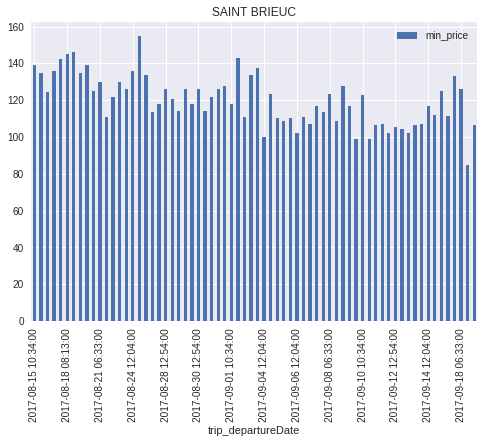

In [11]:
plot_min_price(df_from_db,'USSEL','SAINT BRIEUC')